In [4]:
import   cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


### Question 1 Counting objects

In [5]:
## Sample images  in Data directory
def count_objects(image_path):
    # Load the image using opencv
    image = cv2.imread(image_path)
    # Convert the image to grayscale for easy manipulation
    '''
    cv2.cvtColor(image, code) -> dst : dst is the output image; code is the color space conversion code.
    Images in opencv are stored in BGR format, so we convert it to grayscale
    '''
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply GaussianBlur to reduce noise and help contour detection
    '''
    cv2.GaussianBlur(image, ksize, sigmaX) -> dst : dst is the output image; ksize is the kernel size; sigmaX is the standard deviation in the x direction.
    '''
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    # Use Canny edge detection we could also use sobel
    '''  
    cv2.Canny(image, threshold1, threshold2) -> edges : edges is the output edge map; threshold1 is the first threshold for the hysteresis procedure; threshold2 is the second threshold for the hysteresis procedure.
    '''
    edges = cv2.Canny(blurred, 50, 150)
    # Find contours in the edges, this can help to detect the edges 
    ''' 
    cv2.findContours(image, mode, method) -> contours, hierarchy  : contours is a Python list of all the contours in the image; hierarchy is a numpy array that defines the hierarchy of the contours.
    '''
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Count the number of objects which should just be the number of contours you have i
    return len(contours)
    # return the number of objects

In [19]:
root = 'C:\\Users\\STUDENT\\Documents\\CMU AFRICA\\Spring 2025\\Computer Vision\\Homework 2\\'
distinct_image_path = root + 'q1_data\\1a.png'

print(f"The number of objects in the image is: {count_objects(distinct_image_path)}")
objects_touching_image_path = root + 'q1_data\\1b.png'
print(f"The number of objects in the image with objects touching each other is: {count_objects(objects_touching_image_path)}")

The number of objects in the image is: 7
The number of objects in the image with objects touching each other is: 10


### Question 2 Image Straightening 

In [20]:

def find_lines(image_path):
    # Load the image using opencv
    img = cv2.imread(image_path)
    # Convert the img to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Preprocessing Steps
    # Apply Gaussian Blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    # Contrast Enhancement using CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(blurred)
    # Apply Canny Edge Detection
    edges = cv2.Canny(enhanced, 50, 150)
    #Optional to enhance the edges using morphological operations. Should be applied with care
    # Apply Morphological Operations (Dilation + Erosion)
    # kernel = #Not implemented
    # dilated = #not implemented
    # eroded = #Not implemented
    # Apply Hough Transform to detect lines
    # This returns an array of r and theta values
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)
    # The below for loop runs till r and theta values
    # are in the range of the 2d array
    angles_count = {}
    for r_theta in lines:
        arr = np.array(r_theta[0], dtype=np.float64)
        
        r, theta = arr
        #Convert Polar Coordinates to Cartesian Coordinates
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*r
        y0 = b*r
        #Store the angles in a dictionary to count the number of lines corresponding to that angle
        if theta in angles_count.keys():
            angles_count[theta] += 1
        else:
            angles_count[theta] = 1
        # Second point needed to draw the line
        
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))

        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        # Draw the line on the image
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
    cv2.imwrite('linesDetected.jpg', img)
    # return the angles_count dictionary
    return angles_count


angles_count = find_lines('q2_data/2b.jpg')
top_3_angles = sorted(angles_count, key=angles_count.get, reverse=True)[:3]
img = cv2.imread('linesDetected.jpg')

In [ ]:
# convert top angle go degrees for rotation
angle = #Not implemented

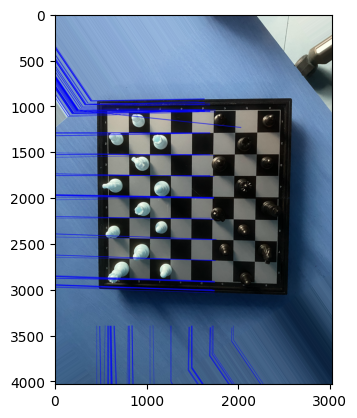

In [17]:
def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, rotation_matrix, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REPLICATE)
    return rotated
rot_img = rotate_image(img, angle)
#show rot_img
plt.imshow(rot_img,cmap='gray')

### Question 3 Image compression

In [ ]:
## Sample images  in Data directory
def compress_image(image_path, compress_ratio):
    # Load image using imread
    # Convert image to grayscale
    # Use numpy to get the fast fourier transform of the grayscale image
    # Sort the absolute value of  the frequencies. You will have to flatten the frequencies => fSorted
    # Determine the threshold to keep using thresh = fSorted[int(np.floor((1-compress_ration)*len(fSorted)))]
    # create a mask to help filter. mask = np.abs(computed_fourier) >  thresh
    # filter the Fourier using the mask filtered = computer_fourier * mask
    # apply inverse fourier to get a compressed version of the image
    # return the image obtained.

### Question 4 Data Augmentation

In [16]:
## Use your own images to test.
def data_augmentation(img, type):
    if type=="resize1":
        # resize the  image to 224 x 224 use nearest neighbor 
    elif type=="resize2":
        # resize the  image to 224 x 224 use cubic spline interpolation
    elif type=="vertical_flip":
        # flip the image vertically
    elif type=="horizontal_flip":
        # flip the image horizontally
    elif type=="blur_noise":
        # flip the image horizontally
    elif type=="rotation":
        # use your own parameters
    elif type=="shear on y-axis":
        # use your own parameters
    elif type=="shear on x-axis":
        # use your own parameters